In [1]:
data = []
with open("/kaggle/input/image-captioning-for-visually-impaired/caption_eng/token-english.txt",'r') as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) == 2:
            image_name_id , caption =  parts
            image_name , id = image_name_id.split("#")
            data.append({"image_name":image_name,"id":id,"caption":caption})

In [2]:
import pandas as pd
df = pd.DataFrame(data)

In [3]:
df.head()

,image_name,id,caption
0,genangan-air-besar-5.jpg,0,Huge puddle in the middle of the road.
1,genangan-air-besar-5.jpg,1,A road with big puddles.
2,genangan-air-besar-5.jpg,2,Be careful there is a big puddle in the middle...
3,genangan-air-besar-24.jpg,0,Huge puddle in the middle of the road.
4,genangan-air-besar-24.jpg,1,A road with big puddles.


In [4]:
data_2 = []
with open("/kaggle/input/image-captioning-for-visually-impaired/caption_eng/token-english2.txt",'r') as file:
    for line in file:
        parts = line.strip().split("\t")
        if len(parts) == 2:
            image_name_id , caption =  parts
            image_name , id = image_name_id.split("#")
            data.append({"image_name":image_name,"id":id,"caption":caption})

In [5]:
import pandas as pd
df_2 = pd.DataFrame(data_2)

In [6]:
data = pd.concat([df,df_2])

In [7]:
data

,image_name,id,caption
0,genangan-air-besar-5.jpg,0,Huge puddle in the middle of the road.
1,genangan-air-besar-5.jpg,1,A road with big puddles.
2,genangan-air-besar-5.jpg,2,Be careful there is a big puddle in the middle...
3,genangan-air-besar-24.jpg,0,Huge puddle in the middle of the road.
4,genangan-air-besar-24.jpg,1,A road with big puddles.
...,...,...,...
8359,motor-5.jpg,1,Be careful of parking motorbikes in the middle...
8360,motor-5.jpg,2,Be careful there are motorbikes parked in the ...
8361,motor-6.jpg,0,Motorcycle parked in the middle of the road.
8362,motor-6.jpg,1,Be careful of parking motorbikes in the middle...


In [8]:
import os

print(len(os.listdir("/kaggle/input/image-captioning-for-visually-impaired/images/images")))

2788


In [9]:
grouped_captions = data.groupby("image_name")["caption"].apply(list)

In [10]:
grouped_captions

image_name
genangan-air-besar-24.jpg    [Huge puddle in the middle of the road., A roa...
genangan-air-besar-31.jpg    [Huge puddle in the middle of the road., A roa...
genangan-air-besar-32.jpg    [Huge puddle in the middle of the road., A roa...
genangan-air-besar-35.jpg    [Huge puddle in the middle of the road., A roa...
genangan-air-besar-38.jpg    [Huge puddle in the middle of the road., A roa...
                                                   ...                        
zebra-cross-kiri-94.jpg      [Zebra cross on the left side of the road., A ...
zebra-cross-kiri-95.jpg      [Zebra cross on the left side of the sidewalk....
zebra-cross-kiri-96.jpg      [Zebra cross on the left side of the sidewalk....
zebra-cross-kiri-97.jpg      [Zebra cross on the left side of the sidewalk....
zebra-cross-kiri-99.jpg      [Zebra cross on the left side of the road., A ...
Name: caption, Length: 2788, dtype: object

In [11]:
all_text = " ".join([" ".join(captions) for captions in grouped_captions])
unique_words = sorted(set(all_text.lower().split()))

In [12]:
unique_words

['a',
 'an',
 'and',
 'are',
 'be',
 'beside',
 'big',
 'busy',
 'by',
 'car',
 'careful',
 'cars',
 'cars.',
 'cross',
 'crossing',
 'crossings',
 'ditch',
 'ditches',
 'for',
 'front.',
 'gutter',
 'gutters',
 'has',
 'have',
 'hole',
 'holes.',
 'huge',
 'in',
 'intersection',
 'intersections',
 'intersections.',
 'is',
 'left',
 'left.',
 'lots',
 'middle',
 'motorbike',
 'motorbikes',
 'motorcycle',
 'motorcycles',
 'no',
 'not',
 'of',
 'on',
 'out',
 'parked',
 'parking',
 'pavement',
 'pavement.',
 'perforated',
 'pothole.',
 'potholed',
 'potholed.',
 'potholes.',
 'puddle',
 'puddles',
 'puddles.',
 'quiet',
 'right',
 'right.',
 'road',
 'road.',
 'roadside.',
 'sewers',
 'side',
 'side.',
 'sidewalk',
 'sidewalk.',
 'sidewalks',
 'sidewalks.',
 'small',
 'streets',
 'the',
 'there',
 "there's",
 'walk',
 'watch',
 'water',
 'with',
 'zebra']

In [13]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [14]:
import nltk
import os
import urllib.request
import zipfile

def download_wordnet_directly():
    # Create directory
    nltk_data = "/kaggle/working/nltk_data/corpora"
    os.makedirs(nltk_data, exist_ok=True)
    
    # Direct download from NLTK's GitHub
    wordnet_url = "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/wordnet.zip"
    zip_path = os.path.join(nltk_data, "wordnet.zip")
    
    print("Downloading WordNet directly...")
    urllib.request.urlretrieve(wordnet_url, zip_path)
    
    print("Extracting WordNet...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(nltk_data)
    
    # Clean up
    os.remove(zip_path)
    
    # Add to NLTK path
    nltk.data.path.insert(0, "/kaggle/working/nltk_data")
    
    print("Testing WordNet...")
    from nltk.corpus import wordnet as wn
    synsets = wn.synsets('test')
    print(f"Success! Found {len(synsets)} synsets for 'test'")

# Run the direct download
download_wordnet_directly()

# Try using the lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print("\nTesting lemmatizer:")
print(lemmatizer.lemmatize("running", pos='v'))

Extracting WordNet...
Testing WordNet...
Success! Found 13 synsets for 'test'

Testing lemmatizer:
run


In [15]:
import string
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

unique_words = sorted(set(word.lower().strip(string.punctuation) for word in unique_words))
unique_words = sorted(set(lemmatizer.lemmatize(word) for word in unique_words))

In [16]:
unique_words

['a',
 'an',
 'and',
 'are',
 'be',
 'beside',
 'big',
 'busy',
 'by',
 'car',
 'careful',
 'cross',
 'crossing',
 'ditch',
 'for',
 'front',
 'gutter',
 'ha',
 'have',
 'hole',
 'huge',
 'in',
 'intersection',
 'is',
 'left',
 'lot',
 'middle',
 'motorbike',
 'motorcycle',
 'no',
 'not',
 'of',
 'on',
 'out',
 'parked',
 'parking',
 'pavement',
 'perforated',
 'pothole',
 'potholed',
 'puddle',
 'quiet',
 'right',
 'road',
 'roadside',
 'sewer',
 'side',
 'sidewalk',
 'small',
 'street',
 'the',
 'there',
 "there's",
 'walk',
 'watch',
 'water',
 'with',
 'zebra']

In [17]:
class Tokenizer:
    def __init__(self,vocab=None,max_length=20):
        self.vocab = vocab or self.build_vocab()
        self.token_to_id = {token:idx for idx,token in enumerate(self.vocab)}
        self.max_length = max_length
    def build_vocab(self):
        return ["[PAD]","[UNK]","<start>","<end>"] 
    def tokenize(self,text):
        tokens =  text.lower().split()
        return tokens
    def encode(self,text):
        tokens = ["<start>"] + self.tokenize(text) +["<end>"]
        token_ids = [self.token_to_id.get(token,self.token_to_id["[UNK]"]) for token in tokens]
        token_ids = token_ids[:self.max_length]
        attention_mask = [1] * len(token_ids)

        while len(token_ids) < self.max_length:
            token_ids.append(self.token_to_id["[PAD]"])
            attention_mask.append(0)
        return {"input_ids":token_ids,"attention_mask":attention_mask}
vocab = ["[PAD]","[UNK]","<start>", "<end>"] + unique_words
tokenizer = Tokenizer(vocab=vocab)

In [18]:
from torch.utils.data import Dataset , DataLoader
from PIL import Image

class Imagecaptioniningdataset(Dataset):
    def __init__(self,df,tokenizer,img_dir,transform=None):
        self.data = df
        self.img_dir = img_dir
        self.tokenizer = tokenizer
        self.transform = transform
        self.group_data = self.data.groupby("image_name")["caption"].apply(list)
    def __len__(self):
        return len(os.listdir(self.img_dir))
    def __getitem__(self,idx):
        img_name = self.group_data.index[idx]
        captions = self.group_data.iloc[idx]

        caption = random.choice(captions)


        img_path = os.path.join(self.img_dir,img_name)
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        tokenized_caption = self.tokenizer.encode(caption)


        input_ids = torch.tensor(tokenized_caption["input_ids"], dtype=torch.long)

        seq_lenght = 20
        tgt_mask = torch.triu(torch.ones(seq_lenght, seq_lenght), diagonal=1).bool()
        return image , input_ids , tgt_mask

In [19]:
from torchvision import transforms
transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])
img_dir = "/kaggle/input/image-captioning-for-visually-impaired/images/images"
DATA = Imagecaptioniningdataset(data,tokenizer,img_dir,transform=transforms)

In [20]:
dataloader = DataLoader(DATA,batch_size=8)

In [21]:
import torch , random
data_iter = iter(dataloader)

image , input_ids , attenation_ids = next(data_iter)

In [22]:
image

tensor([[[[0.3098, 0.2980, 0.2745,  ..., 0.5255, 0.5255, 0.5216],
          [0.4275, 0.4392, 0.4235,  ..., 0.5333, 0.5294, 0.5294],
          [0.4314, 0.4627, 0.4627,  ..., 0.5255, 0.5216, 0.5216],
          ...,
          [0.3294, 0.3569, 0.3490,  ..., 0.4157, 0.4196, 0.4431],
          [0.2980, 0.3373, 0.3373,  ..., 0.4314, 0.4118, 0.4039],
          [0.2118, 0.2471, 0.2314,  ..., 0.2902, 0.2627, 0.2588]],

         [[0.3137, 0.3020, 0.2784,  ..., 0.4824, 0.4824, 0.4784],
          [0.4314, 0.4431, 0.4275,  ..., 0.4902, 0.4863, 0.4863],
          [0.4392, 0.4706, 0.4706,  ..., 0.4863, 0.4824, 0.4784],
          ...,
          [0.2902, 0.3176, 0.3098,  ..., 0.3608, 0.3647, 0.3882],
          [0.2588, 0.2980, 0.2980,  ..., 0.3765, 0.3569, 0.3490],
          [0.1725, 0.2078, 0.1922,  ..., 0.2353, 0.2078, 0.2039]],

         [[0.1882, 0.1765, 0.1569,  ..., 0.4667, 0.4667, 0.4627],
          [0.3059, 0.3176, 0.3020,  ..., 0.4745, 0.4706, 0.4706],
          [0.3137, 0.3451, 0.3451,  ..., 0

In [23]:
input_ids[0]

tensor([ 2,  4, 47, 60, 10,  1,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0])

In [24]:
import random

ss = random.choice(input_ids[0])
ss

tensor(0)

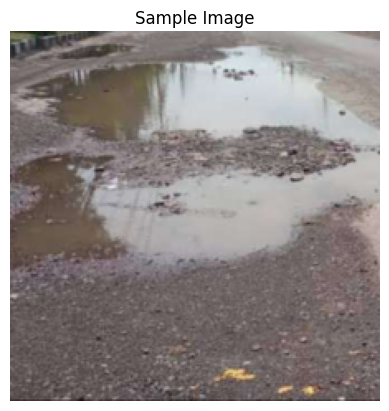

In [25]:
import matplotlib.pyplot as plt

image_np = image[0].permute(1, 2, 0).numpy()  # Permute to (Height, Width, Channels)

# Plot the image
plt.imshow(image_np)
plt.axis("off")  # Turn off axis labels
plt.title("Sample Image")
plt.show()


creating model

for feature extraction of images

In [26]:
from torchvision.models import resnet50 , ResNet50_Weights
import torch.nn as nn

class ResnetFeatureExtractor(nn.Module):
    def __init__(self):
        super(ResnetFeatureExtractor, self).__init__()
        resnet = resnet50(weights=ResNet50_Weights.DEFAULT)
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2]) #(n,2048,7,7)
        self.projection = nn.Linear(2048, 256)
    def forward(self,x):
        features = self.feature_extractor(x)
        features = features.mean(dim=[2, 3])
        projected_features = self.projection(features)
        return projected_features

feature extraction of texts

In [27]:
class PostionalEncoding(nn.Module):
    def __init__(self,embed_size,max_len=20):
        super(PostionalEncoding,self).__init__()
        self.encoding = torch.zeros(max_len,embed_size)
        postion = torch.arange(0,max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0,embed_size,2)*-(torch.log(torch.tensor(1000.0)))/embed_size)
        self.encoding[:,0::2] = torch.sin(postion/div_term)
        self.encoding[:,1::2] = torch.cos(postion/div_term)
        self.encoding = self.encoding.unsqueeze(0)
        
    def forward(self,x):
      
        return x + self.encoding[:,:x.size(1),:]

In [28]:
class CaptionEncoder(nn.Module):
    def __init__(self,vocab_size,embed_size,num_layers,num_heads,hidden_dim,dropout=0.1):
        super(CaptionEncoder,self).__init__()
        self.embedding = nn.Embedding(vocab_size,embed_size)
        self.postional_encoding = PostionalEncoding(embed_size)
        encoder_layer = nn.TransformerEncoderLayer(embed_size,num_heads,hidden_dim,dropout)
        self.encoder = nn.TransformerEncoder(encoder_layer,num_layers)
    def forward(self,x):
        embedding = self.embedding(x)
      #  print(embedding.shape)
        embedding = self.postional_encoding(embedding)
       # print(embedding.shape)
        encoded = self.encoder(embedding.permute(1,0,2))
        return encoded


deocder to get final output

In [29]:
class CaptionDecoder(nn.Module):
    def __init__(self,embed_size,vocab_size,num_layers,num_heads,hidden_dim,dropout=0.1):
        super(CaptionDecoder,self).__init__()
        decoder_layer = nn.TransformerDecoderLayer(embed_size,num_heads,hidden_dim,dropout)
        self.decoder = nn.TransformerDecoder(decoder_layer,num_layers)
        self.fc_out = nn.Linear(embed_size,vocab_size)
    def forward(self,image_caption,encoded_caption,tgt_mask):
        x = self.decoder(image_caption,encoded_caption,tgt_mask=tgt_mask)
        output = self.fc_out(x)
        return output

model of full pipeline

In [30]:
class ImagecaptionModel(nn.Module):
    def __init__(self,vocab_size,embed_size,num_layers,num_heads,hidden_dim,dropout=0.1):
        super(ImagecaptionModel,self).__init__()
        self.image_encoder = ResnetFeatureExtractor()
        self.text_encoder = CaptionEncoder(vocab_size,embed_size,num_layers,num_heads,hidden_dim,dropout=0.1)
        self.decoder = CaptionDecoder(embed_size,vocab_size,num_layers,num_heads,hidden_dim,dropout=0.1)
    def forward(self,images,caption,tgt_mask=None):
        image_features = self.image_encoder(images)
        
      #  print(image_features.shape)
        image_features = image_features.unsqueeze(1).repeat(1, seq_len, 1)  # Shape: [batch_size, seq_len, embed_size]
        image_features = image_features.permute(1, 0, 2)
        text_features = self.text_encoder(caption)
        ouputs = self.decoder(image_features,text_features,tgt_mask=None)
        return ouputs

In [31]:
model = ImagecaptionModel(len(vocab),256,14,16,1024)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 69.7MB/s]
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


training

In [32]:
pad_token_id = 0
num_epochs = 5
from tqdm import tqdm
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [33]:
for epoch in range(num_epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    
    # Create progress bar with both loss and accuracy metrics
    progress_bar = tqdm(dataloader, desc=f"Epoch {epoch+1}/{num_epochs}")
    
    for batch_idx, (images, captions, tgt_masks) in enumerate(progress_bar):
        images = images.to(device)
        captions = captions.to(device)
        tgt_masks = tgt_masks.to(device)
        seq_len = captions.size(1)
        
        # Generate target masks
        tgt_masks = torch.nn.Transformer.generate_square_subsequent_mask(seq_len).to(device)
        
        # Forward pass
        outputs = model(images, captions, tgt_masks)
        outputs = outputs.permute(1, 0, 2)  # Shape: [batch_size, seq_length, vocab_size]
        
        # Compute loss
        loss = criterion(outputs.reshape(-1, outputs.size(-1)), captions.reshape(-1))
        
        # Compute accuracy
        predictions = outputs.argmax(dim=-1)  # Shape: [batch_size, seq_length]
        correct_predictions = (predictions == captions).float()
        
        # Mask out padding tokens (assuming pad_token_id is defined)
        pad_mask = (captions != pad_token_id).float()
        accuracy = (correct_predictions * pad_mask).sum() / pad_mask.sum()
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Accumulate metrics
        epoch_loss += loss.item()
        epoch_accuracy += accuracy.item()
        
        # Update progress bar with current batch metrics
        progress_bar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'avg_loss': f'{epoch_loss/(batch_idx+1):.4f}',
        })
    
    # Calculate and print epoch metrics
    avg_epoch_loss = epoch_loss / len(dataloader)
    avg_epoch_accuracy = epoch_accuracy / len(dataloader)
    print(f"\nEpoch {epoch+1} Summary:")
    print(f"Average Loss: {avg_epoch_loss:.4f}")


Epoch 1/5: 100%|██████████| 349/349 [19:45<00:00,  3.40s/it, loss=2.1879, avg_loss=2.2997]



Epoch 1 Summary:
Average Loss: 2.2997


Epoch 2/5: 100%|██████████| 349/349 [19:14<00:00,  3.31s/it, loss=2.2347, avg_loss=2.2603]



Epoch 2 Summary:
Average Loss: 2.2603


Epoch 3/5: 100%|██████████| 349/349 [19:13<00:00,  3.30s/it, loss=2.2506, avg_loss=2.3598]



Epoch 3 Summary:
Average Loss: 2.3598


Epoch 4/5: 100%|██████████| 349/349 [19:08<00:00,  3.29s/it, loss=2.4311, avg_loss=2.3638]



Epoch 4 Summary:
Average Loss: 2.3638


Epoch 5/5: 100%|██████████| 349/349 [19:14<00:00,  3.31s/it, loss=2.4828, avg_loss=2.3412]


Epoch 5 Summary:
Average Loss: 2.3412
